## Exercise 3 (p.198, Chap.5)

#### 3. We now review k-fold cross-validation.

#### (a) Explain how k-fold cross-validation is implemented.

In [1]:
# randomly k-fold CV dividing the set of observations into k groups, or folds, of approximately equal size.
# The mean squared error, MSE1, is then computed on the observations in the held-out fold, and this is the test error.
# This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error,
# MSE1, MSE2,..., MSEk. The k-fold CV estimate is computed by averaging these values.

#### (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:

#### i. The validation set approach?

In [2]:
# advantage: computational, more feasible 
# very general approach that can be applied to almost any statistical learning method
# not for special case when k is set to equal n

#### ii. LOOCV?

In [3]:
# advantage: special case of k-fold CV in which k is set to equal n, computational
# disadvantages: computationally expensive, may pose computational problems,

## Exercise 8 (p.200, Chap.5)

#### We will now perform cross-validation on a simulated data set.

#### (a) Generate a simulated data set as follows:
#### > set.seed(1)
#### > x=rnorm(100)
#### > y=x-2*x^2+rnorm (100)
#### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [4]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

#n=100, p=2 
#y=x-2*x^2+error

#### (b) Create a scatterplot of X against Y . Comment on what you find.

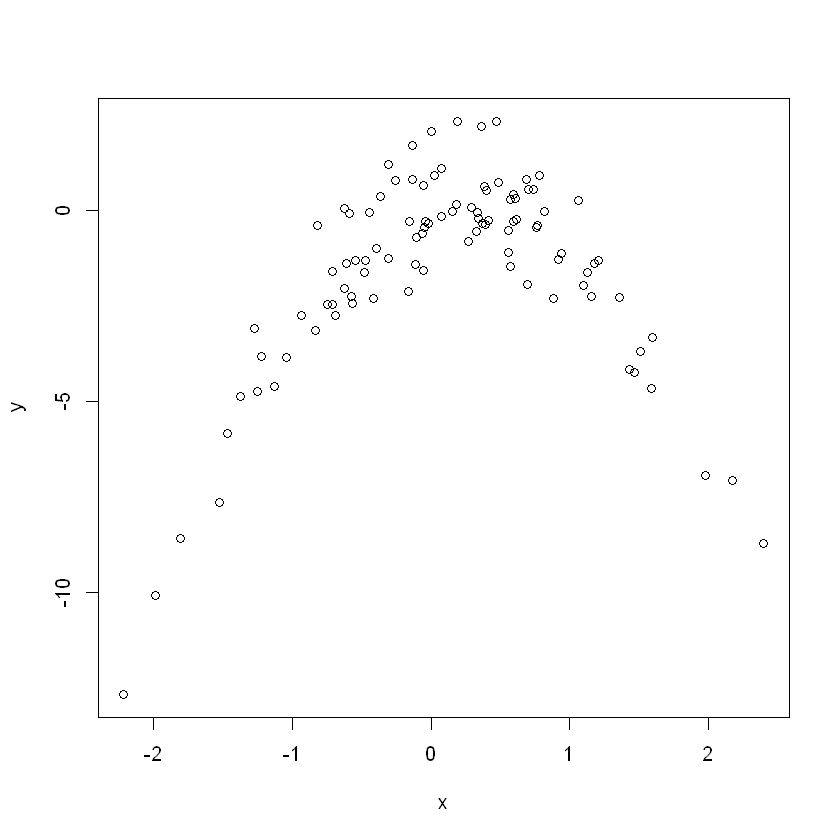

In [5]:
plot(x,y)
# approximately non-linear (quadratic) relatioship
# range for x: around -2 to 3
# range for y: around-15 to 5

#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

#### Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

#### i. Y = β0 + β1X + 

In [6]:
library(boot)
data = data.frame(x, y)
set.seed(530)

In [7]:
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 7.288162 7.284744

#### ii. Y = β0 + β1X + β2X2 + 

In [8]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 0.9374236 0.9371789

#### iii. Y = β0 + β1X + β2X2 + β3X3 + 

In [9]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 0.9566218 0.9562538

#### iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + .

In [10]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 0.9539049 0.9534453

#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [11]:
set.seed(30)

In [12]:
glm.fit = glm(y ~ x)
cv.glm(data, glm.fit)$delta

[1] 7.288162 7.284744

In [13]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(data, glm.fit)$delta

[1] 0.9374236 0.9371789

In [14]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(data, glm.fit)$delta

[1] 0.9566218 0.9562538

In [15]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(data, glm.fit)$delta

[1] 0.9539049 0.9534453

In [16]:
# The results are the same even different seeds are used.
# It is because it evaluates n folds of a single observation.

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

In [17]:
# The quadratic polynomial had the loweat LOOCV error, it is because it match more to the true form of Y.

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [18]:
summary(glm(y~poly(x,degree=1,raw=TRUE)))


Call:
glm(formula = y ~ poly(x, degree = 1, raw = TRUE))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -1.6254     0.2619  -6.205 1.31e-08 ***
poly(x, degree = 1, raw = TRUE)   0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


In [19]:
summary(glm(y~poly(x,degree=2,raw=TRUE)))


Call:
glm(formula = y ~ poly(x, degree = 2, raw = TRUE))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.05672    0.11766   0.482    0.631    
poly(x, degree = 2, raw = TRUE)1  1.01716    0.10798   9.420  2.4e-15 ***
poly(x, degree = 2, raw = TRUE)2 -2.11892    0.08477 -24.997  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2


In [20]:
summary(glm(y~poly(x,degree=3,raw=TRUE)))


Call:
glm(formula = y ~ poly(x, degree = 3, raw = TRUE))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.06151    0.11950   0.515    0.608    
poly(x, degree = 3, raw = TRUE)1  0.97528    0.18728   5.208 1.09e-06 ***
poly(x, degree = 3, raw = TRUE)2 -2.12379    0.08700 -24.411  < 2e-16 ***
poly(x, degree = 3, raw = TRUE)3  0.01764    0.06429   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2


In [21]:
summary(glm(y~poly(x,degree=4,raw=TRUE)))


Call:
glm(formula = y ~ poly(x, degree = 4, raw = TRUE))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.156703   0.139462   1.124    0.264    
poly(x, degree = 4, raw = TRUE)1  1.030826   0.191337   5.387 5.17e-07 ***
poly(x, degree = 4, raw = TRUE)2 -2.409898   0.234855 -10.261  < 2e-16 ***
poly(x, degree = 4, raw = TRUE)3 -0.009133   0.067229  -0.136    0.892    
poly(x, degree = 4, raw = TRUE)4  0.069785   0.053240   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


In [22]:
# Degree=1 and 2 coefficients are statistically significant.

## Exercise 1 (p.259, Chap.6)

#### 1. We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2,...,p predictors. Explain your answers:

#### (a) Which of the three models with k predictors has the smallest training RSS?

In [23]:
# Best subset selection has the smallest training RSS because it fits a separate least squares regression for each possible combination of the p predictors, with the goal to identifying the one that is the best, it means smalest RSS

#### (b) Which of the three models with k predictors has the smallest test RSS?

In [24]:
# Best subset selection may have the smallest test RSS because it considers more models then the other methods. However, the other models might have better luck picking a model that fits the test data better.

#### (c) True or False:

#### i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

In [25]:
# True

#### ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.

In [26]:
# True

#### iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

In [27]:
# False

#### iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

In [28]:
# False

#### v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

In [29]:
# False

## Exercise 9 (p.263, Chap.6)

#### 9. In this exercise, we will predict the number of applications received using the other variables in the College data set.

#### (a) Split the data set into a training set and a test set.

In [30]:
library(ISLR)
set.seed(530)
sum(is.na(College))

[1] 0

In [31]:
trainsize = dim(College)[1] / 2
train = sample(1:dim(College)[1], trainsize)
test = -train
College.train = College[train, ]
College.test = College[test, ]

#### (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [32]:
lm.fit = lm(Apps~., data=College.train)
lm.pred = predict(lm.fit, College.test)
mean((College.test[, "Apps"] - lm.pred)^2)

[1] 918181.8

#### (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [33]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-2



In [34]:
train.mat = model.matrix(Apps~., data=College.train)
test.mat = model.matrix(Apps~., data=College.test)
grid = 10 ^ seq(4, -2, length=100)
mod.ridge = cv.glmnet(train.mat, College.train[, "Apps"], alpha=0, lambda=grid, thresh=1e-12)
lambda.best = mod.ridge$lambda.min
lambda.best

[1] 0.01

In [35]:
ridge.pred = predict(mod.ridge, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - ridge.pred)^2)

[1] 918143.5

#### (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [36]:
mod.lasso = cv.glmnet(train.mat, College.train[, "Apps"], alpha=1, lambda=grid, thresh=1e-12)
lambda.best = mod.lasso$lambda.min
lambda.best

[1] 0.01

In [37]:
lasso.pred = predict(mod.lasso, newx=test.mat, s=lambda.best)
mean((College.test[, "Apps"] - lasso.pred)^2)

[1] 918091.2

In [38]:
mod.lasso = glmnet(model.matrix(Apps~., data=College), College[, "Apps"], alpha=1)
predict(mod.lasso, s=lambda.best, type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -471.39372069
(Intercept)    .         
PrivateYes  -491.04485135
Accept         1.57033288
Enroll        -0.75961467
Top10perc     48.14698891
Top25perc    -12.84690694
F.Undergrad    0.04149116
P.Undergrad    0.04438973
Outstate      -0.08328388
Room.Board     0.14943472
Books          0.01532293
Personal       0.02909954
PhD           -8.39597537
Terminal      -3.26800340
S.F.Ratio     14.59298267
perc.alumni   -0.04404771
Expend         0.07712632
Grad.Rate      8.28950241

#### (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [39]:
library(pls)


Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




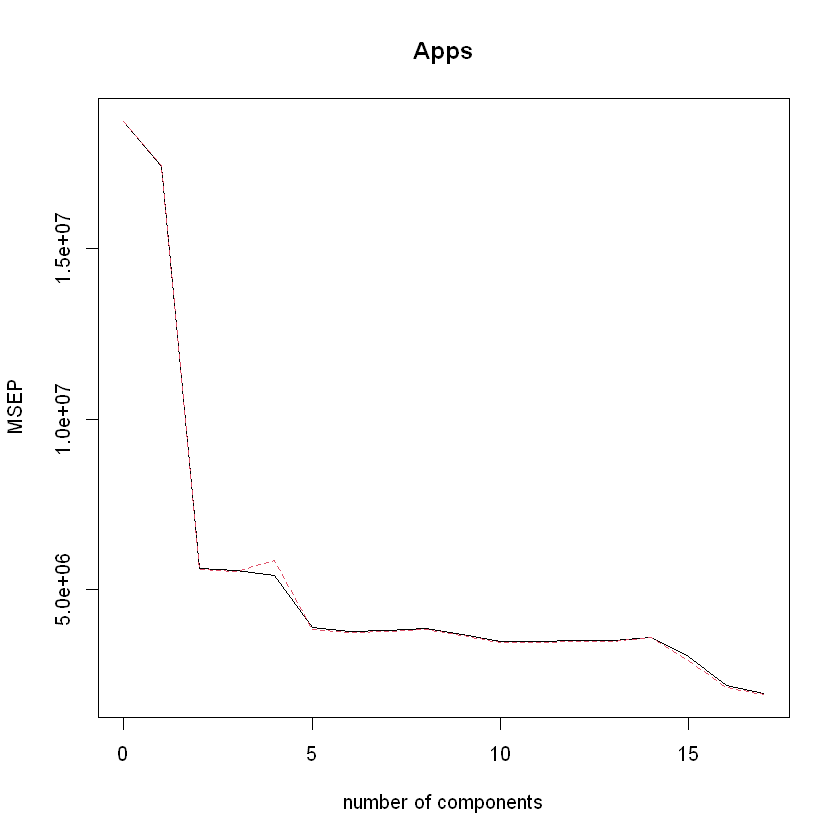

In [40]:
pcr.fit = pcr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [41]:
pcr.pred = predict(pcr.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pcr.pred))^2)

Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"


[1] NA

#### (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

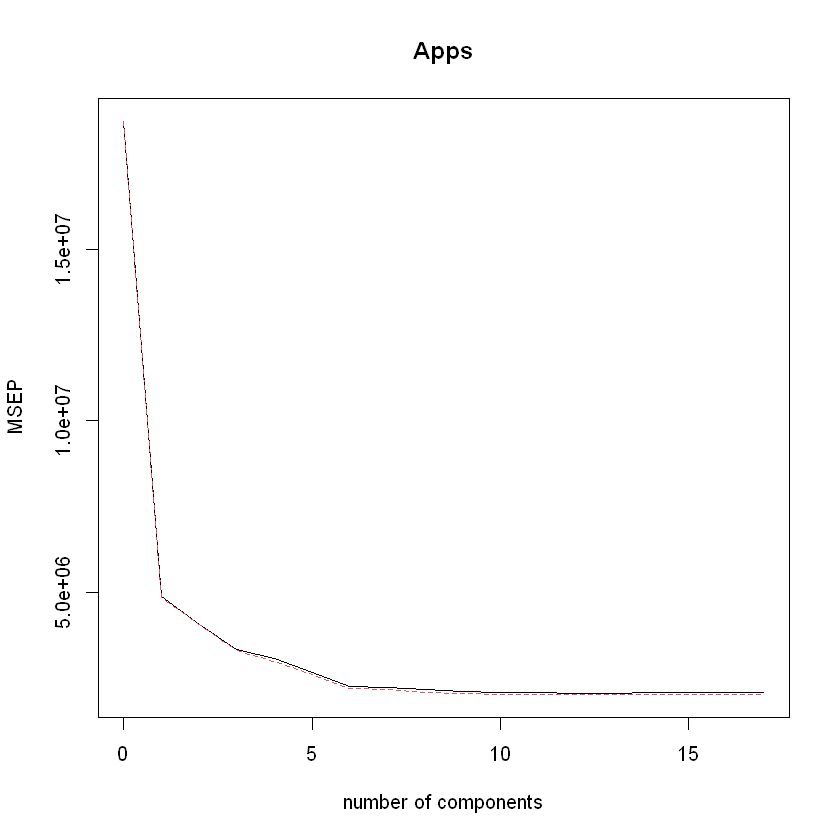

In [42]:
pls.fit = plsr(Apps~., data=College.train, scale=T, validation="CV")
validationplot(pls.fit, val.type="MSEP")

In [43]:
pls.pred = predict(pls.fit, College.test, ncomp=10)
mean((College.test[, "Apps"] - data.frame(pls.pred))^2)

Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"


[1] NA

#### (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

Warning message in mean.default((College.test[, "Apps"] - data.frame(pcr.pred))^2):
"argument is not numeric or logical: returning NA"
Warning message in mean.default((College.test[, "Apps"] - data.frame(pls.pred))^2):
"argument is not numeric or logical: returning NA"


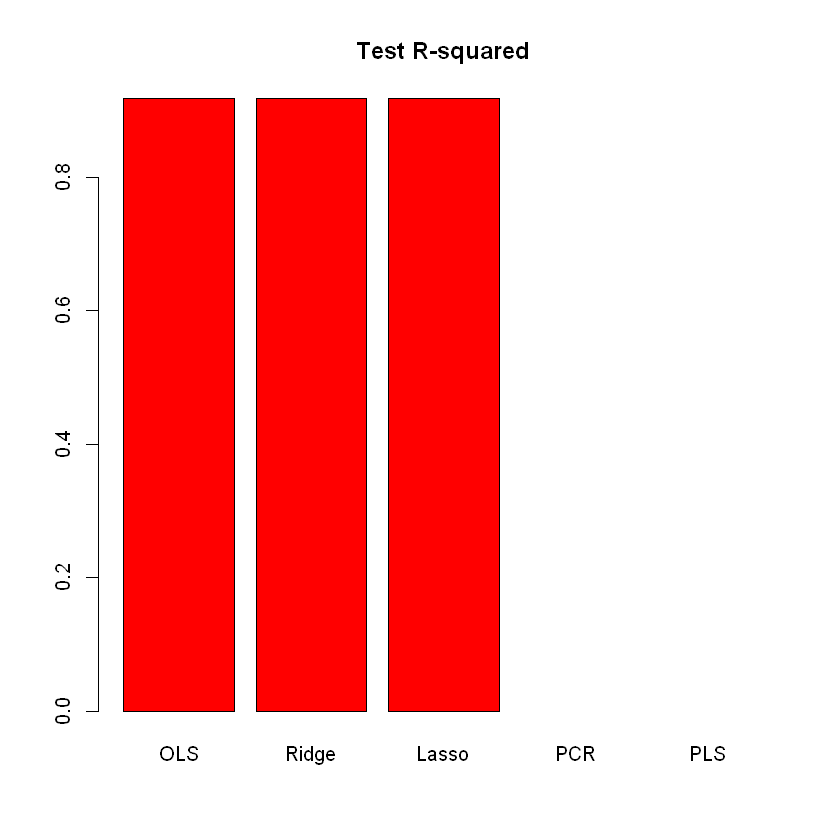

In [44]:
test.avg = mean(College.test[, "Apps"])
lm.test.r2 = 1 - mean((College.test[, "Apps"] - lm.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
ridge.test.r2 = 1 - mean((College.test[, "Apps"] - ridge.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
lasso.test.r2 = 1 - mean((College.test[, "Apps"] - lasso.pred)^2) /mean((College.test[, "Apps"] - test.avg)^2)
pcr.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pcr.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
pls.test.r2 = 1 - mean((College.test[, "Apps"] - data.frame(pls.pred))^2) /mean((College.test[, "Apps"] - test.avg)^2)
barplot(c(lm.test.r2, ridge.test.r2, lasso.test.r2, pcr.test.r2, pls.test.r2), col="red", names.arg=c("OLS", "Ridge", "Lasso", "PCR", "PLS"), main="Test R-squared")

In [45]:
# The plot shows that test R2 for all models except PCR are around 0.9, with PLS having slightly higher test R2R2 than others. PCR has a smaller test R2R2 of less than 0.8. All models except PCR predict college applications with high accuracy.

## Exercise 9 (p.299, Chap.7)

####  9. This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

#### (a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [46]:
set.seed(1)
library(MASS)
attach(Boston)

In [47]:
lm.fit = lm(nox ~ poly(dis, 3), data = Boston)
summary(lm.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


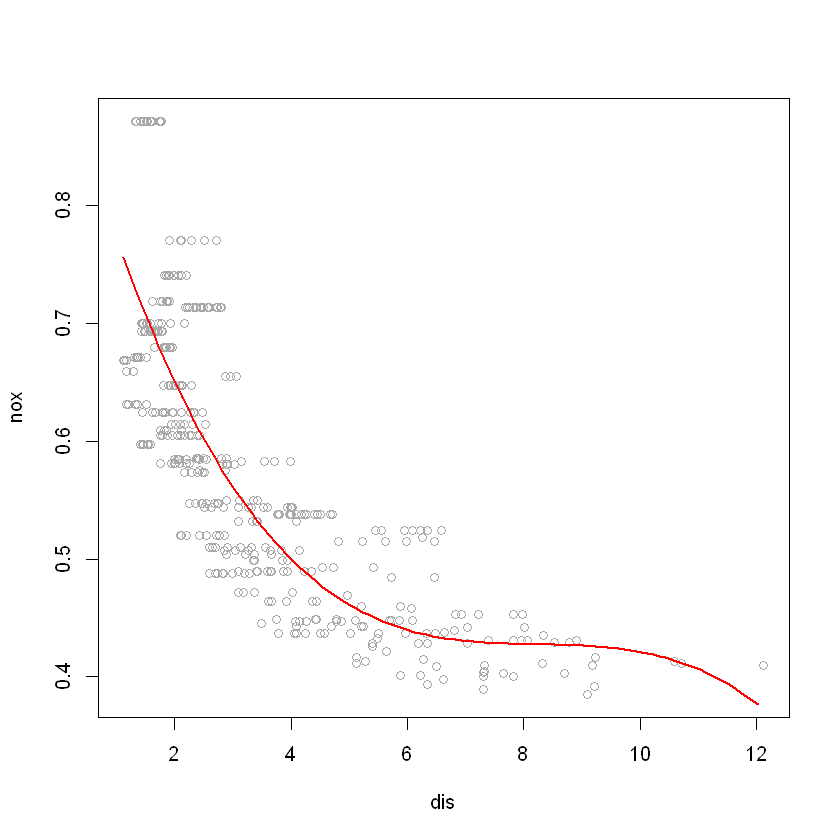

In [48]:
dislim = range(dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)
lm.pred = predict(lm.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, lm.pred, col = "red", lwd = 2)

#### (b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

In [49]:
all.rss = rep(NA, 10)
for (i in 1:10) {
    lm.fit = lm(nox ~ poly(dis, i), data = Boston)
    all.rss[i] = sum(lm.fit$residuals^2)
}
all.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

#### (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

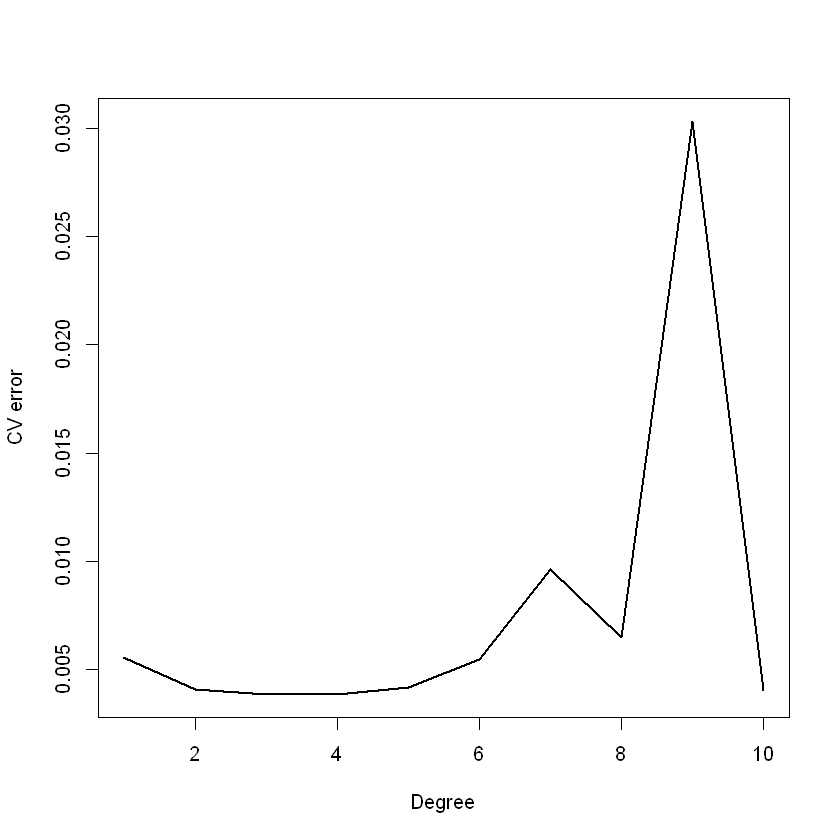

In [50]:
library(boot)
all.deltas = rep(NA, 10)
for (i in 1:10) {
    glm.fit = glm(nox ~ poly(dis, i), data = Boston)
    all.deltas[i] = cv.glm(Boston, glm.fit, K = 10)$delta[2]
}
plot(1:10, all.deltas, xlab = "Degree", ylab = "CV error", type = "l", pch = 20, 
    lwd = 2)

#### (d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

In [54]:
library(splines)
sp.fit = lm(nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)
summary(sp.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, df = 4, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, df = 4, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, df = 4, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adju

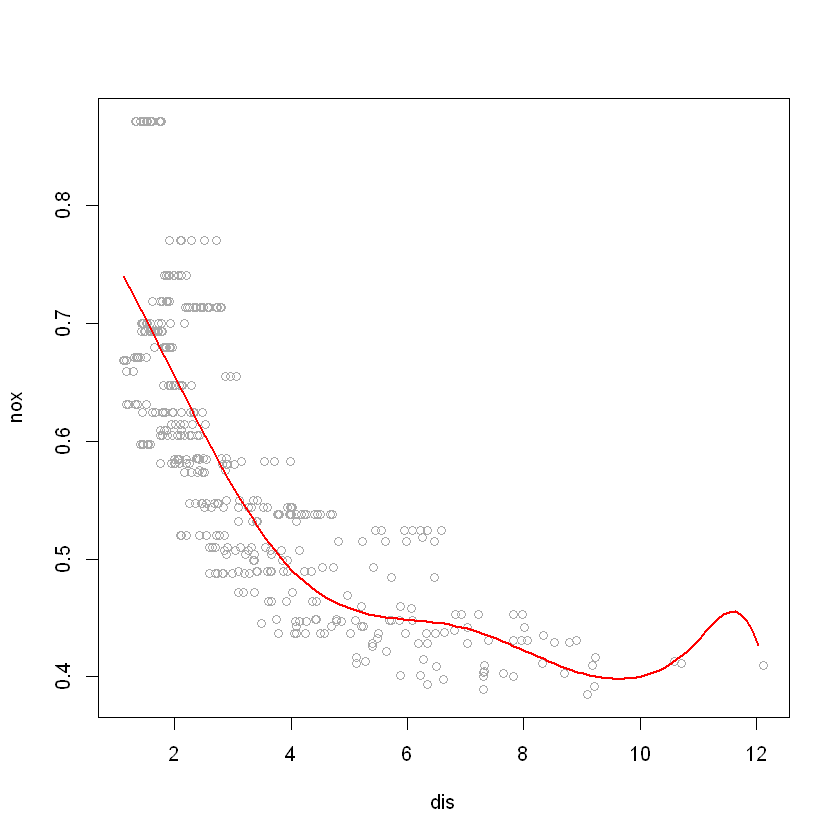

In [55]:
sp.pred = predict(sp.fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, sp.pred, col = "red", lwd = 2)

#### (e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

In [56]:
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = lm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = sum(lm.fit$residuals^2)
}
all.cv[-c(1, 2)]

[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546

#### (f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

In [57]:
all.cv = rep(NA, 16)
for (i in 3:16) {
    lm.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    all.cv[i] = cv.glm(Boston, lm.fit, K = 10)$delta[2]
}

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.3175), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(di

Warning message in bs(dis, degree = 3L, knots = c(`7.142857%` = 1.5768, `14.28571%` = 1.7936, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`7.142857%` = 1.5768, `14.28571%` = 1.7936, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"


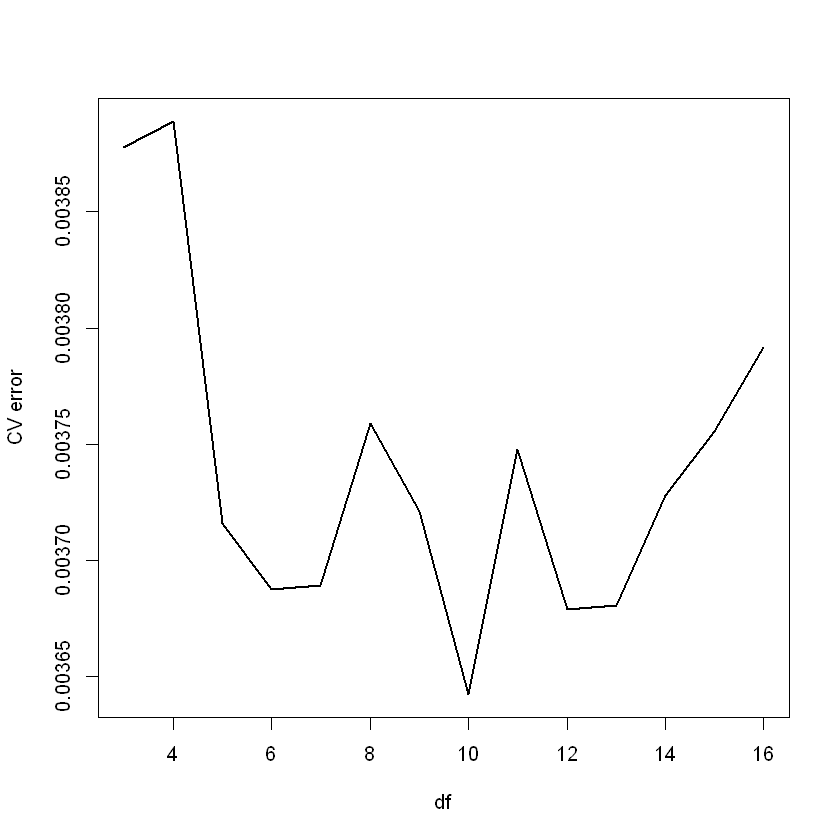

In [58]:
plot(3:16, all.cv[-c(1, 2)], lwd = 2, type = "l", xlab = "df", ylab = "CV error")

## Exercise 10 (p.300, Chap.7)

#### 10. This question relates to the College data set.

#### (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

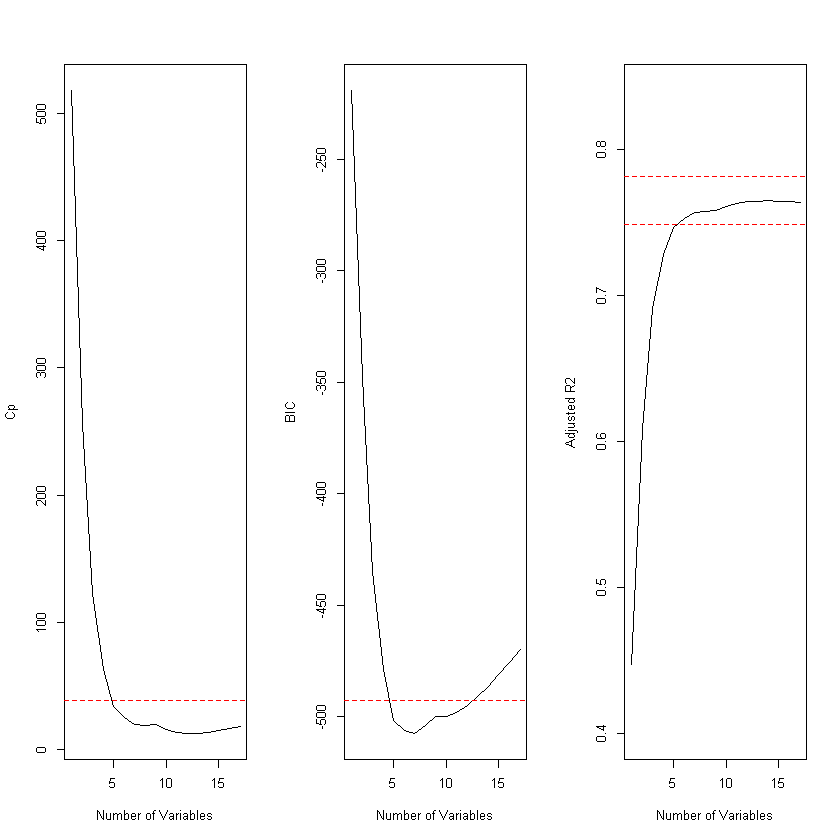

In [61]:
set.seed(530)
library(ISLR)
library(leaps)
attach(College)
train = sample(length(Outstate), length(Outstate)/2)
test = -train
College.train = College[train, ]
College.test = College[test, ]
reg.fit = regsubsets(Outstate ~ ., data = College.train, nvmax = 17, method = "forward")
reg.summary = summary(reg.fit)
par(mfrow = c(1, 3))
plot(reg.summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
min.cp = min(reg.summary$cp)
std.cp = sd(reg.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(reg.summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
min.bic = min(reg.summary$bic)
std.bic = sd(reg.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(reg.summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R2", 
    type = "l", ylim = c(0.4, 0.84))
max.adjr2 = max(reg.summary$adjr2)
std.adjr2 = sd(reg.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)

In [62]:
reg.fit = regsubsets(Outstate ~ ., data = College, method = "forward")
coefi = coef(reg.fit, id = 6)
names(coefi)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "PhD"         "perc.alumni"
[6] "Expend"      "Grad.Rate"

#### (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [63]:
library(gam)

Loading required package: foreach

Loaded gam 1.20




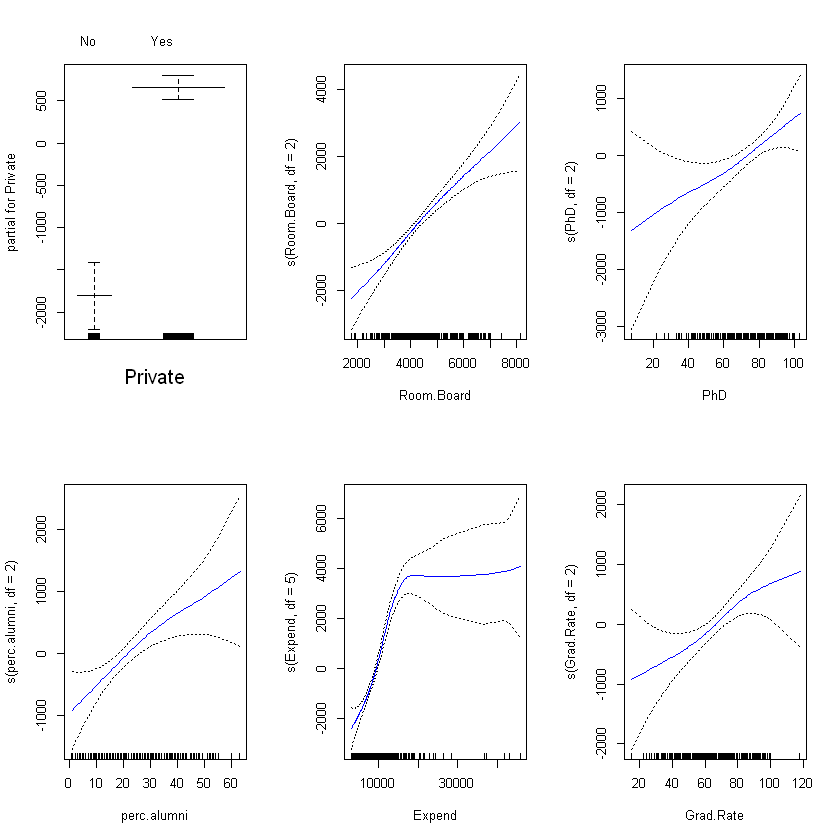

In [64]:
gam.fit = gam(Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, df = 2) + 
    s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, df = 2), data = College.train)
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

#### (c) Evaluate the model obtained on the test set, and explain the results obtained.

In [65]:
gam.pred = predict(gam.fit, College.test)
gam.err = mean((College.test$Outstate - gam.pred)^2)
gam.err

[1] 3553062

In [66]:
gam.tss = mean((College.test$Outstate - mean(College.test$Outstate))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 0.7749389

#### (d) For which variables, if any, is there evidence of a non-linear relationship with the response?

In [67]:
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, df = 2) + s(PhD, 
    df = 2) + s(perc.alumni, df = 2) + s(Expend, df = 5) + s(Grad.Rate, 
    df = 2), data = College.train)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-5620.8 -1108.9   101.7  1319.5  4456.6 

(Dispersion Parameter for gaussian family taken to be 3451049)

    Null Deviance: 6416907560 on 387 degrees of freedom
Residual Deviance: 1287239711 on 372.9996 degrees of freedom
AIC: 6958.824 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq F value  Pr(>F)    
Private                  1 1690448735 1690448735 489.836 < 2e-16 ***
s(Room.Board, df = 2)    1 1236056645 1236056645 358.168 < 2e-16 ***
s(PhD, df = 2)           1  442396771  442396771 128.192 < 2e-16 ***
s(perc.alumni, df = 2)   1  278146612  278146612  80.598 < 2e-16 ***
s(Expend, df = 5)        1  521070929  521070929 150.989 < 2e-16 ***
s(Grad.Rate, df = 2)     1   35523